In [72]:
# import necessary libraries

import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [73]:
file = open('synth_hasherror.csv', 'rb')
    
df = pd.read_csv(file, header=None)

pd.set_option('display.max_columns', None)

df

,0,1,2,3
0,0.000000,0.000000,0.968750,0.016020
1,0.000000,0.000000,0.984375,0.016020
2,0.000000,0.000000,0.992188,0.016020
3,0.000000,0.000000,0.996094,0.016020
4,0.000000,0.500000,0.998047,0.016020
5,0.134872,0.082609,0.461401,0.003663
6,0.143092,0.047647,0.477026,0.003663
7,0.156449,0.040172,0.484839,0.003663
8,0.144598,0.027173,0.488745,0.003663
9,0.142049,0.020258,0.490698,0.003663


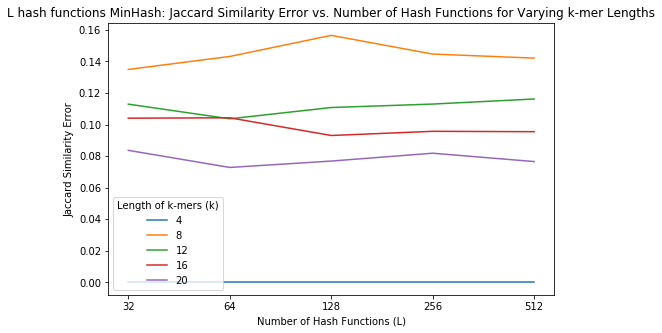

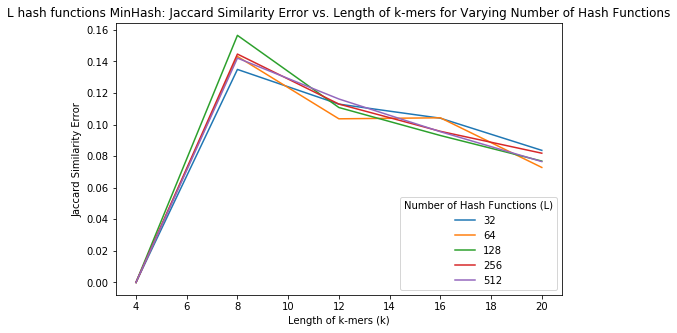

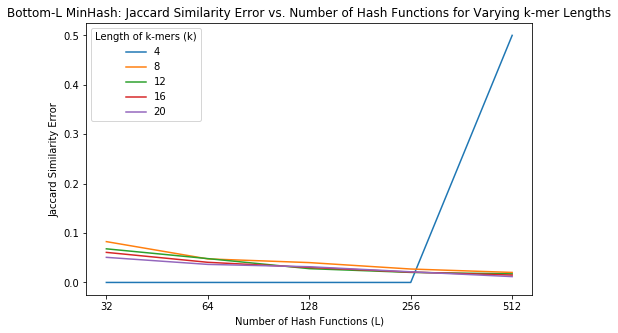

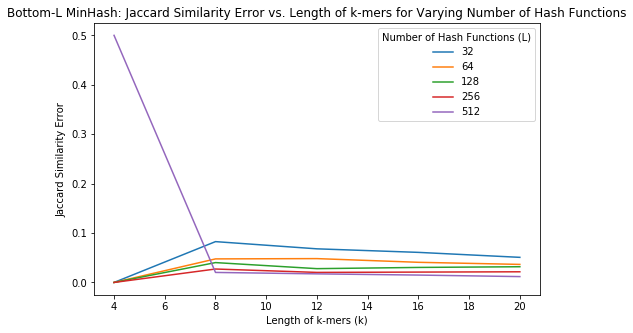

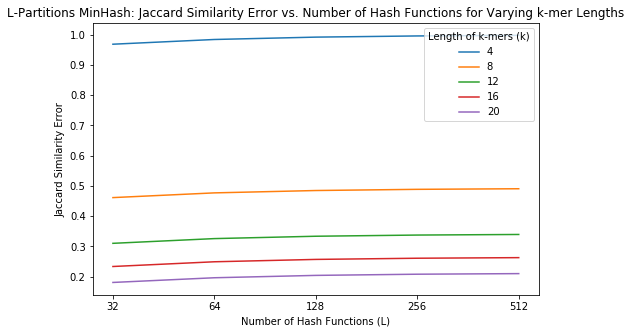

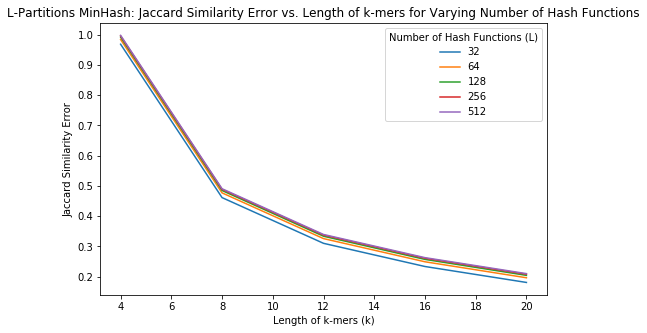

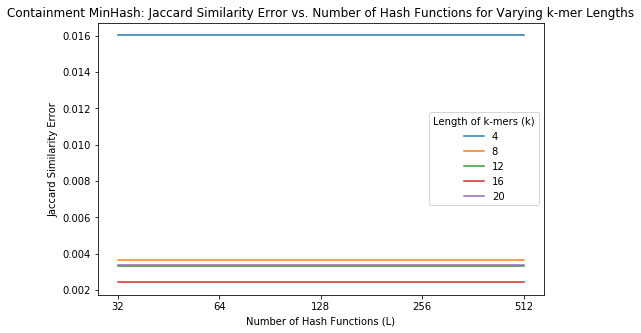

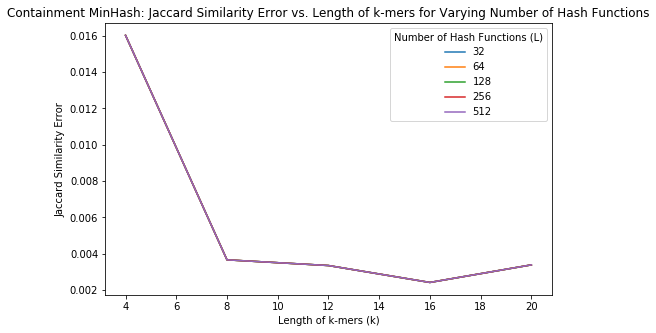

In [74]:
# L = 32, 64, 128, 256, 512 (INNER LOOP)
# k = 4, 8, 12, 16, 20 (OUTER LOOP)

figsize=(8, 5)

Ls = [32, 64, 128, 256, 512]
Ls_text = ['32', '64', '128', '256', '512']
ks = [4, 8, 12, 16, 20]
min_hash = ['L hash functions MinHash', 'Bottom-L MinHash', 'L-Partitions MinHash', 'Containment MinHash']

fn = 0

# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=figsize)

for j, mh in enumerate(min_hash):
    
#     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)

    for i in range(5):
        
        plt.figure(fn, figsize=figsize)
        plt.plot(Ls_text, df.iloc[len(Ls)*i:len(Ls)*(i+1), j])
        plt.legend(ks, title='Length of k-mers (k)')
        plt.xlabel('Number of Hash Functions (L)')
        plt.ylabel('Jaccard Similarity Error')
        plt.title('%s: Jaccard Similarity Error vs. Number of Hash Functions for Varying k-mer Lengths' %mh)
    #     plt.xticks(Ls)
        plt.savefig('%s_L' %mh)

        plt.figure(fn+1, figsize=figsize)
        plt.plot(ks, df.iloc[i::len(ks), j])
        plt.legend(Ls, title='Number of Hash Functions (L)')
        plt.xlabel('Length of k-mers (k)')
        plt.ylabel('Jaccard Similarity Error')
        plt.title('%s: Jaccard Similarity Error vs. Length of k-mers for Varying Number of Hash Functions' %mh)
        plt.savefig('%s_k' %mh)
    
    fn += 2
    